## :  Import Data

In [1]:
! pip install statsmodels==0.13.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 5.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import numpy as np
import matplotlib 
import scipy
import sklearn
import statsmodels
import seaborn
import pydot
import os
from sklearn.preprocessing import StandardScaler

import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from statsmodels.tsa.ar_model import AutoReg 

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier


from scipy import stats
from scipy.stats.stats import mode
from scipy.stats import uniform
from sklearn.model_selection import (train_test_split, RepeatedKFold,RandomizedSearchCV)

from sklearn.linear_model import Ridge

from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pickle


from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import plotly.express as px

from sklearn.manifold import TSNE

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM


from os import listdir
from os.path import isfile, join

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('drive/MyDrive/HIML/Trab_Final/') 

In [5]:
ls

data/  Isabel_Tiago_Proj.ipynb  plot_13_probes.png  plot_test.png


In [6]:
input_files = [f for f in listdir('data/') if isfile(join('data/',f))
               and f.endswith('h1.csv') # to change Hidrophone, chande de h + number of hidrophone
               and 'sur_pos' not in f 
               and 'time' not in f]
input_files

# time = [f for f in listdir('data/') if isfile(join('data/',f))
#                and f.endswith('time.csv') ] 

data_hp1 = np.zeros((len(input_files),19500))
label = pd.read_csv(r'data/y.csv') 

# time = pd.read_csv(r'data/sinc50kHz_casing_9_CE_samp_1_time.csv')
i = 0

for name in input_files:
    aux = np.genfromtxt('data/'+name, delimiter=',', skip_header = 1)
    aux = aux.transpose()
    x  = aux.reshape((1,-1))
    data_hp1[i,:] = x

    
    i = i+1

print(data_hp1.shape, data_hp1)

(130, 19500) [[-1.75169635e-04  1.21950000e-03 -4.49169212e-04 ... -1.23735000e-02
  -1.13955000e-02 -3.65000000e-05]
 [-1.64000000e-04  3.01366670e-04  2.78500000e-04 ... -1.37855000e-02
  -1.21895000e-02  1.56100000e-03]
 [-4.38000000e-04 -2.28550000e-03  3.56000000e-04 ... -1.07270000e-02
  -1.22870000e-02 -5.06050000e-03]
 ...
 [ 3.13921185e-04 -3.47500000e-04 -1.56500000e-04 ...  1.65050000e-03
  -2.18335550e-05 -4.69000000e-04]
 [-7.15500000e-04 -4.05000000e-05 -4.54430650e-05 ...  8.60000000e-05
   2.11500000e-04  4.88736781e-04]
 [ 4.05000000e-05 -1.30000000e-04 -1.26500000e-04 ... -4.98350000e-03
   2.52250000e-03  3.25800000e-03]]


In [7]:
input_files = [f for f in listdir('data/') if isfile(join('data/',f))
               and f.endswith('h2.csv') # to change Hidrophone, chande de h + number of hidrophone
               and 'sur_pos' not in f 
               and 'time' not in f]
input_files

data_hp2 = np.zeros((len(input_files),19500))
label = pd.read_csv(r'data/y.csv') 

i = 0

for name in input_files:
    aux = np.genfromtxt('data/'+name, delimiter=',', skip_header = 1)
    aux = aux.transpose()
    x  = aux.reshape((1,-1))
    data_hp2[i,:] = x

    
    i = i+1

print(data_hp2.shape, data_hp2)

(130, 19500) [[-8.54500000e-04  1.39550000e-03  6.75000000e-05 ...  6.53000000e-04
  -7.42400000e-03 -7.74250000e-03]
 [ 5.60500000e-04  3.32000000e-04  4.46500000e-04 ...  5.03900000e-03
   1.59050000e-03 -3.83150000e-03]
 [ 3.93140657e-05 -1.15513805e-04  3.83599020e-04 ... -1.37350000e-03
  -7.24250000e-03 -5.57200000e-03]
 ...
 [ 1.87000000e-04 -1.32500000e-04 -2.85950170e-04 ... -6.61000000e-04
  -9.51191550e-05  8.44500000e-04]
 [ 3.02469430e-04 -1.60485785e-04 -3.09000000e-04 ...  3.39500000e-04
   4.85850000e-03  3.01650000e-03]
 [-2.86000000e-04  5.05000000e-05  7.02000000e-04 ...  1.42650000e-03
   7.86500000e-04 -8.54000000e-04]]


In [8]:
input_files = [f for f in listdir('data/') if isfile(join('data/',f))
               and f.endswith('h3.csv') # to change Hidrophone -> h + hidrophone number
               and 'sur_pos' not in f 
               and 'time' not in f]
input_files

data_hp3 = np.zeros((len(input_files),19500))
label = pd.read_csv(r'data/y.csv') 

i = 0

for name in input_files:
    aux = np.genfromtxt('data/'+name, delimiter=',', skip_header = 1)
    aux = aux.transpose()
    x  = aux.reshape((1,-1))
    data_hp3[i,:] = x

    
    i = i+1

print(data_hp3.shape, data_hp3)

(130, 19500) [[-2.18000000e-04 -6.60881300e-05 -7.10000000e-05 ... -5.60000000e-05
   1.17090000e-02  1.46750000e-02]
 [ 1.82152255e-04 -1.37700000e-03 -4.93019515e-04 ... -9.76300000e-03
   6.42000000e-03  1.46650000e-02]
 [ 3.44500000e-04  2.00000000e-06  1.41500000e-04 ... -1.07970000e-02
   2.96900000e-03  1.25930000e-02]
 ...
 [ 2.65000000e-05 -9.07132000e-06 -1.37417550e-04 ...  2.05750000e-03
  -1.37750000e-03 -2.15850000e-03]
 [-3.56500000e-04 -1.45862775e-04 -1.00000000e-06 ...  3.76746620e-04
   1.19186350e-05 -9.10500000e-04]
 [-4.93000000e-04 -4.69500000e-04 -2.58000000e-04 ... -3.09400000e-03
   7.09000000e-04 -9.17375800e-05]]


In [9]:
input_files = [f for f in listdir('data/') if isfile(join('data/',f))
               and f.endswith('h3.csv') # to change Hidrophone -> h + hidrophone number
               and 'sur_pos' not in f 
               and 'time' not in f]
input_files

data_hp4 = np.zeros((len(input_files),19500))

i = 0

for name in input_files:
    aux = np.genfromtxt('data/'+name, delimiter=',', skip_header = 1)
    aux = aux.transpose()
    x  = aux.reshape((1,-1))
    data_hp4[i,:] = x

    
    i = i+1

print(data_hp4.shape, data_hp4)

(130, 19500) [[-2.18000000e-04 -6.60881300e-05 -7.10000000e-05 ... -5.60000000e-05
   1.17090000e-02  1.46750000e-02]
 [ 1.82152255e-04 -1.37700000e-03 -4.93019515e-04 ... -9.76300000e-03
   6.42000000e-03  1.46650000e-02]
 [ 3.44500000e-04  2.00000000e-06  1.41500000e-04 ... -1.07970000e-02
   2.96900000e-03  1.25930000e-02]
 ...
 [ 2.65000000e-05 -9.07132000e-06 -1.37417550e-04 ...  2.05750000e-03
  -1.37750000e-03 -2.15850000e-03]
 [-3.56500000e-04 -1.45862775e-04 -1.00000000e-06 ...  3.76746620e-04
   1.19186350e-05 -9.10500000e-04]
 [-4.93000000e-04 -4.69500000e-04 -2.58000000e-04 ... -3.09400000e-03
   7.09000000e-04 -9.17375800e-05]]


In [10]:
data = (data_hp1+data_hp2) / 2

In [11]:
data.shape

(130, 19500)

In [12]:
label

,label
0,CE-E1
1,CE-E1
2,CE-E1
3,CE-E1
4,CE-E1
...,...
125,NE
126,NE
127,NE
128,NE


## : Início do processamento

In [13]:
#input_files

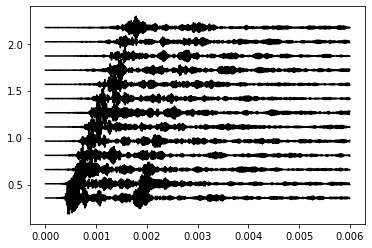

In [14]:
Ch1 = data[1,:].reshape((13,-1))

Ts = 3.125 * 1e-3 # sampling time
# time = pd.read_csv(r'data/sinc50kHz_casing_9_CE_samp_1_time.csv')
time = pd.read_csv(r'data/sinc50kHz_casing_9_CE_samp_1_time.csv') #* Ts
pos = pd.read_csv(r'data/sinc50kHz_casing_9_CE_samp_1_sur_pos.csv')

fig, ax = plt.subplots()

for case in range(0,13):
    ax.plot(time.values,Ch1[case,:] + pos.values[case][0], 'k')

plt.savefig('plot_13_probes.png', dpi=400, format='png')


## : feature extraction PCA 


In [15]:
pca = PCA(n_components=.95)
X_pca = pca.fit_transform(data)

print('matrix X.shape: ',X_pca.shape,'\n X_PCA:', X_pca)

matrix X.shape:  (130, 36) 
 X_PCA: [[ 0.21886592 -1.78884879 -1.27256746 ...  0.00722241  0.04083163
   0.02136022]
 [ 0.16828967 -1.7078949  -1.32297583 ... -0.03427301  0.04609496
   0.09341049]
 [ 0.22565699 -1.76438734 -1.23779489 ...  0.00495081 -0.06380199
  -0.05281487]
 ...
 [-0.2370953  -0.11015689  0.16971736 ... -0.23198514  0.07313665
   0.18884941]
 [-0.41555697 -0.28264606  0.05466732 ...  0.03531389 -0.00402734
  -0.11230222]
 [-0.34193018 -0.23908679  0.0691217  ... -0.00327776  0.03081967
   0.02857187]]


In [16]:
print(pca.explained_variance_ratio_ , pca.singular_values_)

[0.23243551 0.14423704 0.12141218 0.10259414 0.04574463 0.03778848
 0.0272831  0.02566755 0.02252064 0.02196183 0.01843015 0.01329638
 0.01165075 0.01046892 0.00970418 0.00881295 0.00855738 0.00800486
 0.00740136 0.00680574 0.00665977 0.00646571 0.00605974 0.00508857
 0.00463352 0.00441332 0.00418294 0.00390227 0.00378177 0.00360735
 0.00352445 0.0033565  0.00316149 0.0028742  0.00279659 0.00261764] [10.0781312   7.93902513  7.28383155  6.69560851  4.47093963  4.06357664
  3.45283322  3.34904471  3.13703355  3.09786894  2.83787473  2.41043514
  2.25634568  2.13884653  2.05924549  1.96240872  1.93374442  1.87027592
  1.79839292  1.72451341  1.70591902  1.68088123  1.62725542  1.49116817
  1.42293262  1.38871001  1.35197712  1.30583255  1.28551217  1.2555174
  1.24100803  1.21107789  1.17536949  1.12069368  1.10545998  1.06950626]


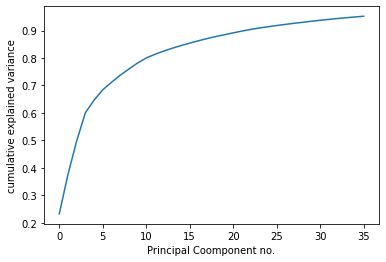

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Coomponent no.')
plt.ylabel('cumulative explained variance');
plt.savefig('cumulativevar.png', dpi=400, format='png')

In [18]:
df = pd.DataFrame(X_pca)
# conc = pd.concat([df,label],axis=1,ignore_index=True)
# conc

df['label']=label
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,label
0,0.218866,-1.788849,-1.272567,1.286013,-0.025384,0.110330,-0.078616,-0.073011,-0.060965,0.020220,...,0.034464,-0.048834,0.071760,-0.017183,-0.005208,0.031162,0.007222,0.040832,0.021360,CE-E1
1,0.168290,-1.707895,-1.322976,1.308286,0.012410,0.029317,-0.337297,-0.240902,-0.234894,-0.105893,...,-0.045248,-0.050391,-0.037330,0.070267,0.025179,0.026804,-0.034273,0.046095,0.093410,CE-E1
2,0.225657,-1.764387,-1.237795,1.317395,-0.062924,0.095478,-0.104374,-0.090659,-0.122462,-0.068372,...,0.062345,0.026197,-0.019397,0.015576,-0.024753,-0.077575,0.004951,-0.063802,-0.052815,CE-E1
3,0.250648,-1.779244,-1.266482,1.304862,-0.009416,0.063917,-0.149459,-0.068594,-0.085247,-0.066582,...,-0.022735,0.017353,0.026853,-0.024080,0.022302,-0.014098,0.004972,0.003337,0.032484,CE-E1
4,0.150545,-1.692308,-1.127476,1.253241,-0.113124,0.077051,0.052341,0.008866,0.014841,-0.077939,...,0.037335,0.065705,-0.018302,-0.070278,-0.029900,-0.112453,0.025672,-0.124504,-0.128077,CE-E1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.243562,-0.172117,0.016343,-0.517160,-0.395717,1.134862,-0.063609,-0.102538,-0.213893,0.407456,...,0.076614,-0.110156,0.055485,0.024799,-0.005150,0.056961,0.046080,-0.001202,0.028711,NE
126,-0.298643,-0.124896,0.047392,-0.627602,-0.148419,1.168864,0.219554,0.121235,0.003090,0.412120,...,-0.151628,0.101904,-0.058364,0.168007,0.009866,0.033027,-0.163595,0.057479,0.032558,NE
127,-0.237095,-0.110157,0.169717,-0.472418,-0.356296,0.251117,0.061189,0.012236,-0.005983,0.086856,...,0.077621,0.080538,0.113152,0.292894,0.141428,-0.114810,-0.231985,0.073137,0.188849,NE
128,-0.415557,-0.282646,0.054667,-0.699325,-0.327229,1.697663,-0.316652,-0.262862,-0.029602,-0.235446,...,-0.122264,0.073279,-0.095211,-0.151736,0.018817,-0.090885,0.035314,-0.004027,-0.112302,NE


In [19]:
label_2 = {}
label_3 = {}
col_label = 36

for i in range(0,130):
  if df.iloc[i,col_label] == 'CE-E1' or df.iloc[i,col_label] == 'CH-E1' or df.iloc[i,col_label] == 'CL-E1' or df.iloc[i,col_label] == 'E1':
    label_2[i] = df.iloc[i,col_label][-2:]
    if len(df.iloc[i,col_label]) == 2:
      label_3[i] = 'F'
    else: 
      label_3[i] = df.iloc[i,col_label][0:2]

  elif df.iloc[i,col_label] == 'CE-E2' or df.iloc[i,col_label] == 'CH-E2' or df.iloc[i,col_label] == 'CL-E2' or df.iloc[i,col_label] == 'E2':
    label_2[i] = df.iloc[i,col_label][-2:]
    if len(df.iloc[i,col_label]) == 2:
      label_3[i] = 'F'
    else: 
      label_3[i] = df.iloc[i,col_label][0:2]
  
  elif df.iloc[i,col_label] == 'CE' or df.iloc[i,col_label] == 'CH-NE' or df.iloc[i,col_label] == 'CL-NE' or df.iloc[i,col_label] == 'NE':
    label_2[i] = df.iloc[i,col_label][-2:]
    if len(df.iloc[i,col_label]) == 2:
      label_3[i] = 'F'
    else: 
      label_3[i] = df.iloc[i,col_label][0:2]


In [20]:
len(label_3)

130

In [21]:
# label_2

In [22]:
df['def']=label_2.values()
df['cement']=label_3.values()
df


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,label,def,cement
0,0.218866,-1.788849,-1.272567,1.286013,-0.025384,0.110330,-0.078616,-0.073011,-0.060965,0.020220,...,0.071760,-0.017183,-0.005208,0.031162,0.007222,0.040832,0.021360,CE-E1,E1,CE
1,0.168290,-1.707895,-1.322976,1.308286,0.012410,0.029317,-0.337297,-0.240902,-0.234894,-0.105893,...,-0.037330,0.070267,0.025179,0.026804,-0.034273,0.046095,0.093410,CE-E1,E1,CE
2,0.225657,-1.764387,-1.237795,1.317395,-0.062924,0.095478,-0.104374,-0.090659,-0.122462,-0.068372,...,-0.019397,0.015576,-0.024753,-0.077575,0.004951,-0.063802,-0.052815,CE-E1,E1,CE
3,0.250648,-1.779244,-1.266482,1.304862,-0.009416,0.063917,-0.149459,-0.068594,-0.085247,-0.066582,...,0.026853,-0.024080,0.022302,-0.014098,0.004972,0.003337,0.032484,CE-E1,E1,CE
4,0.150545,-1.692308,-1.127476,1.253241,-0.113124,0.077051,0.052341,0.008866,0.014841,-0.077939,...,-0.018302,-0.070278,-0.029900,-0.112453,0.025672,-0.124504,-0.128077,CE-E1,E1,CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.243562,-0.172117,0.016343,-0.517160,-0.395717,1.134862,-0.063609,-0.102538,-0.213893,0.407456,...,0.055485,0.024799,-0.005150,0.056961,0.046080,-0.001202,0.028711,NE,NE,F
126,-0.298643,-0.124896,0.047392,-0.627602,-0.148419,1.168864,0.219554,0.121235,0.003090,0.412120,...,-0.058364,0.168007,0.009866,0.033027,-0.163595,0.057479,0.032558,NE,NE,F
127,-0.237095,-0.110157,0.169717,-0.472418,-0.356296,0.251117,0.061189,0.012236,-0.005983,0.086856,...,0.113152,0.292894,0.141428,-0.114810,-0.231985,0.073137,0.188849,NE,NE,F
128,-0.415557,-0.282646,0.054667,-0.699325,-0.327229,1.697663,-0.316652,-0.262862,-0.029602,-0.235446,...,-0.095211,-0.151736,0.018817,-0.090885,0.035314,-0.004027,-0.112302,NE,NE,F


In [23]:
fig = px.scatter_3d(
    df, x=0, y=1, z=2, color='label',
    # title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

plt.savefig('plot_labels.png', dpi=400, format='png')

<Figure size 432x288 with 0 Axes>

In [28]:
fig = px.scatter_3d(
    df, x=0, y=1, z=2, color='def',
    # title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

plt.savefig('def.png', dpi=400, format='png')

<Figure size 432x288 with 0 Axes>

In [25]:
fig = px.scatter_3d(
    df, x=0, y=1, z=2, color='cement',
    # title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

plt.savefig('plot_cement.png', dpi=400, format='png')

<Figure size 432x288 with 0 Axes>

## : Scale Feature

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Normalizando PCA
X1_max_min = MinMaxScaler(feature_range=(-1,1))
X1_train = X1_max_min.fit_transform(X_pca)
X1_train

print('Confirmando a normalização:','\n X1 máximo normalizado: ', X1_train.max(), '\n X1 minimo normalizado: ',X1_train.min())


Confirmando a normalização: 
 X1 máximo normalizado:  1.0000000000000004 
 X1 minimo normalizado:  -1.0
